In [58]:
# Example data
library(microbiome)
library(dplyr)
library(phyloseq)
library("qiime2R")
data(enterotype)
library(ggplot2)
library(RColorBrewer)
library(reshape2)
library(viridis)

Loading required package: viridisLite



In [2]:
setwd('..')
workdir = getwd()

In [ ]:
#
pseq<-qza_to_phyloseq(
    features=paste(workdir,"/feature_table/table.qza",sep=""),
    tree=paste(workdir,"/phylo_tree/rooted_tree.qza",sep=""),
         paste(workdir,"/taxonomy/tax_ezbiocloud.qza",sep=""),
    paste(workdir,"/metadata/metadata.tsv",sep="")
    )

In [29]:
# Calculate compositional version of the data
# (relative abundances)
pseq.rel <- microbiome::transform(pseq, "compositional")

# Core line plots

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Transformation introduced infinite values in continuous x-axis"


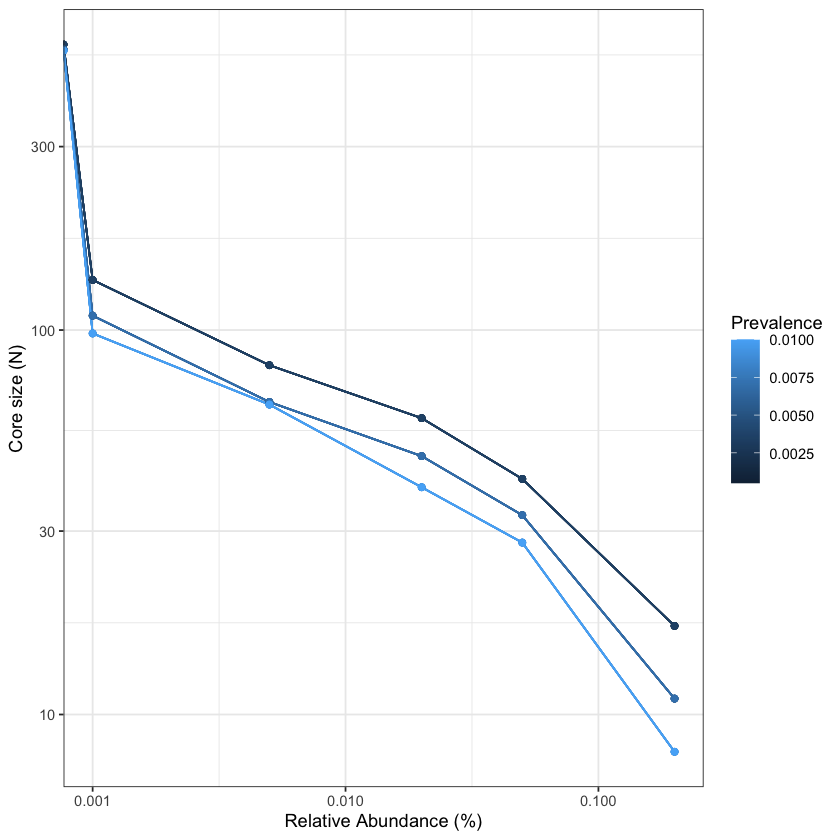

In [45]:
# With compositional (relative) abundances
det <- c(0, 0.1, 0.5, 2, 5, 20)/100
prevalences <- seq(.05, 1, .05) 

plot_core(pseq.rel, prevalences = prevalences, detections = det, plot.type = "lineplot") + xlab("Relative Abundance (%)") + theme_bw() + scale_y_continuous(trans = 'log10')+ scale_x_continuous(trans = 'log10')

# Core heatmaps

[1] "0.1%"               "0.180164823065441%" "0.324593634702017%"
[4] "0.584803547642573%" "1.05361027689066%"  "1.89823509115937%" 
[7] "3.41995189335339%"  "6.16155027758334%"  "11.1009461556962%" 


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



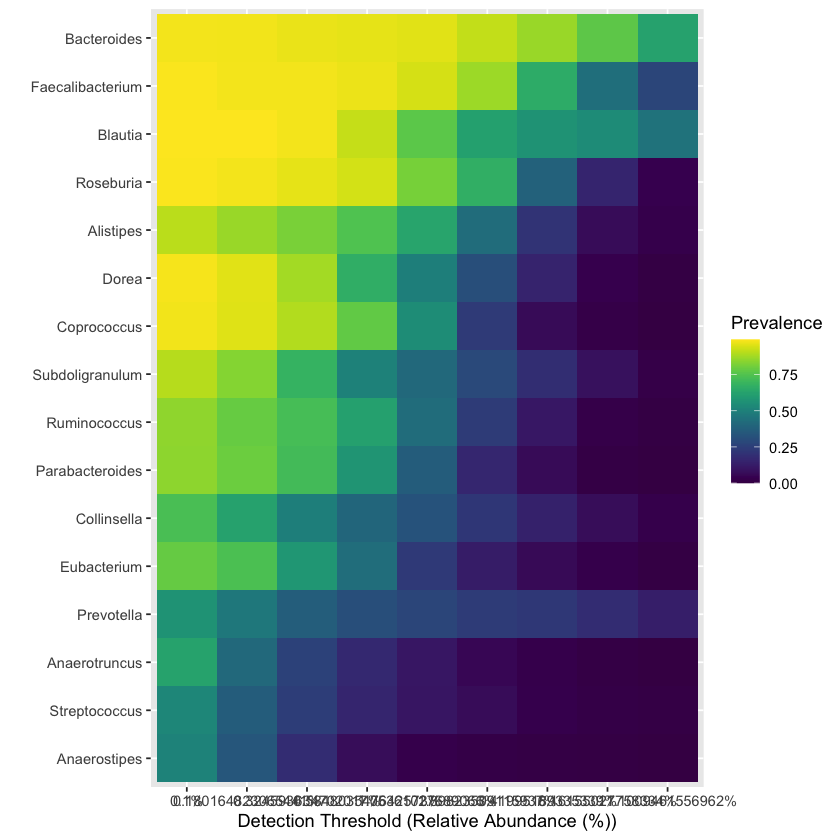

In [60]:

    #### I do not understand this code  ####

prevalences <- seq(.05, 1, .05)
detections <- 10^seq(log10(1e-3), log10(.2), length = 10)

# Also define gray color palette
gray <- gray(seq(0,1,length=5))
p1 <- plot_core(pseq.rel, 
                plot.type = "heatmap", 
                colours = gray,
                prevalences = prevalences, 
                detections = detections,
                min.prevalence = .5) +
    xlab("Detection Threshold (Relative Abundance (%))")
p1 <- p1 + scale_fill_viridis()
p1